### Universidad Católica "Nuestra Señora de la Asunción"
### Facultad de Ciencias y Tecnología
---

#Telecomunicaciones 1

#Laboratorio PSK

---

**Contenido:**


1.   Generación de señales PSK

---

In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended


**1) Generación de Señales PSK:**

CPFSK

\begin{equation}
s(t) = \sqrt{\frac{2\mathcal{E}}{T}}\cos\left[2\pi f_c t + \phi(t;\boldsymbol{I})+ \phi_0\right]   
\end{equation} 
donde 
\begin{equation}
\phi(t;\boldsymbol{I}) = 4\pi T\,f_d\int_{-\infty}^{t} d(\tau)d\tau
\end{equation}        

Simbolos= [0. 1. 2. 3. 1. 0. 2. 3.]
AMPLITUD para cada símbolo= [-3. -1.  1.  3. -1. -3.  1.  3.]


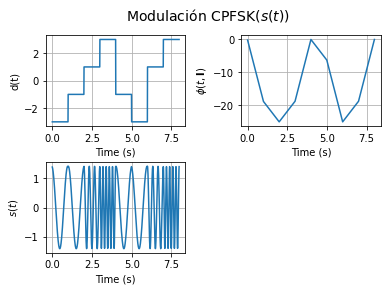

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import math

# Definimos secuencia de bits de entrada a transmitir (Se puede modificar la secuecnai para fines de prueba)
I=[0,0,0,1,1,0,1,1,0,1,0,0,1,0,1,1]   #Debe ser multiplo de k= log2 M

M= 4      # Cantidad de simbolos/frecuencias
Ts= 0.01  #Sampling time de nuestro script
k=int(math.log(M,2)) #Longitud del vectores de simbolos o bloque bits
Tsym= 1   # Tiempo de simbolo
Tsim= int(len(I)/k*Tsym)   # Tiempo total de simulación
#print("Tsim=", Tsim)
E=1
phi_0=0

#Definimos el paso  de frecuencia
f_d=1/(2*Tsym)  #Minimo para alcanzar la ortogonalidad de frecuencia (Condición de FSK)
fc=2 

#Definimos los vectores de tiempo
t = np.arange(0,Tsim,Ts)
tsym=np.arange(0,Tsym,Ts)

#Generamos el conjunto de ampitudes para la señal base PAM
Am=np.arange(-M+1,M,2)

#Asociamos una amplitud a cada simbolo
symbols=np.zeros(int(len(I)/k))
Amp_symbols=np.zeros(int(len(I)/k))
#print("Tsim=", Tsim)

for i in range(0,len(symbols),1):
  for j in range(0,k,1):
    symbols[i]=symbols[i] + I[(i+1)*k-j-1]*math.pow(2,j)
  Amp_symbols[i]=Am[int(symbols[i])]

print("Simbolos=", symbols)
print("AMPLITUD para cada símbolo=", Amp_symbols)

d=[]
#Generamos la secuencia temporal de las amplitudes de los simbolos
for i in range(0,len(Amp_symbols),1):
  d=np.append(d,Amp_symbols[i]*np.ones(len(tsym)))


#Graficamos neustra secuencia d(t)
plt.subplot(2, 2, 1)
plt.plot(t,d);
plt.xlabel('Time (s)');
plt.ylabel('d(t)');
plt.grid(True)


#Generamos nuestro vector de fase phi(t;I)
phi=4*np.pi*Tsym*Ts*f_d*np.cumsum(d)

#Graficamos nuestra secuencia d(t)
plt.subplot(2, 2, 2)
plt.plot(t,phi);
plt.xlabel('Time (s)');
plt.ylabel('$\phi(t,\mathbf{I})$');
plt.grid(True)


#Ahora generamos s(t)
s=math.sqrt((2*E/Tsym))*np.cos(2*np.pi*fc*t+phi+phi_0)
fase=phi+phi_0


#Graficamos nuestra señal CPFSK s(t)
plt.subplot(2, 2, 3)
plt.plot(t,s);
plt.xlabel('Time (s)');
plt.ylabel('$s(t)$');
plt.grid(True)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.suptitle('Modulación CPFSK($s(t)$)', fontsize=14)
plt.show()

**IMPORTANT**


1. Se puede observar la **continudad de fase**. Los esquemas con memoria solucionan el **problema cómun de los esquemas sin memoria**.  


